In [53]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# loading Parkinsons Telemontioring dataset into a dataframe
pdata = pd.read_csv('parkinsons_updrs.data')
pdata.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
pdata.shape

(5875, 22)

In [5]:
# drop NAs
pdata.dropna(axis=0, inplace=True)
pdata.shape

(5875, 22)

In [6]:
# define X matrix and y variable
y = pdata['total_UPDRS']
X = pdata.drop('total_UPDRS', axis = 1)

# splitting the data into training and test data - 80:20 split
x_tr, x_test, y_tr, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 6)

In [7]:
# normalizing the data
min_max_scaler = MinMaxScaler()
x_tr = min_max_scaler.fit_transform(x_tr)
x_test = min_max_scaler.transform(x_test)

In [39]:
model = Sequential()
model.add(Dense(1000, input_shape=(x_tr.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "mse", metrics = ['mae'])

parkinsons = model.fit(x_tr, y_tr, epochs = 100, batch_size = 16, verbose = 0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              22000     
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dense_7 (Dense)             (None, 1)                 251       
                                                                 
Total params: 648,001
Trainable params: 648,001
Non-trainable params: 0
_________________________________________________________________


In [52]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMSE for Neural Networks:", mse)

37/37 [==============================] - 0s 973us/step

MSE for Neural Networks: 0.3190144359495205


In [42]:
history = parkinsons.history

In [44]:
loss = history['loss']
mae = history['mae']

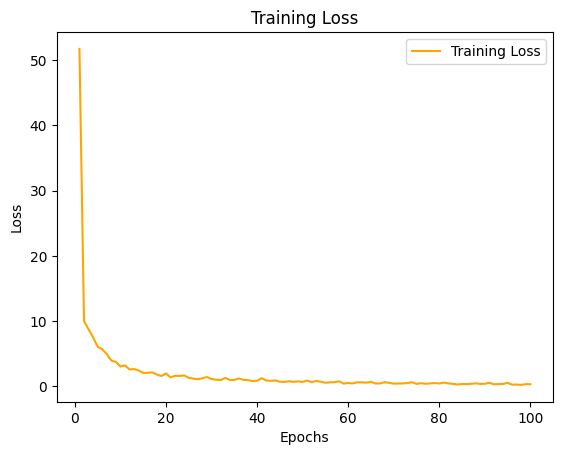

In [49]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label = "Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

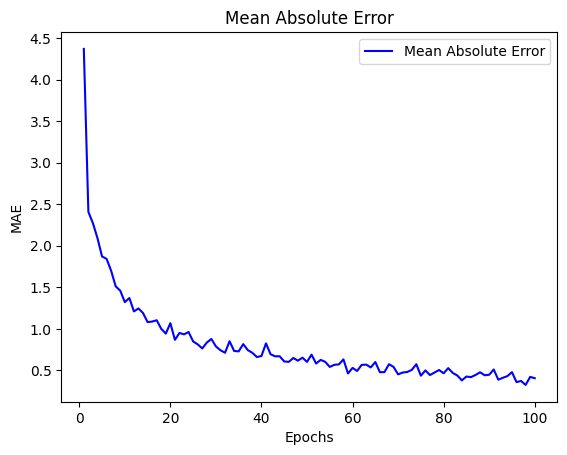

In [50]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae, 'blue', label = "Mean Absolute Error")
plt.title("Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()